# Python可视化
- https://blog.csdn.net/Yellow_python/article/details/80524885
- https://blog.csdn.net/Yellow_python/article/details/80606897

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
import numpy as np, pandas as pd, seaborn
from matplotlib import pyplot as mp
from mpl_toolkits import mplot3d  # 三维坐标轴
from sklearn.datasets import make_regression, make_blobs, load_iris  # 数据集
%matplotlib inline

# 热力图、等高线图、三维曲面图

In [2]:
x = np.linspace(-3, 3, 999)
x, y = np.meshgrid(x, x)
z = (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

#### 绘制热力图

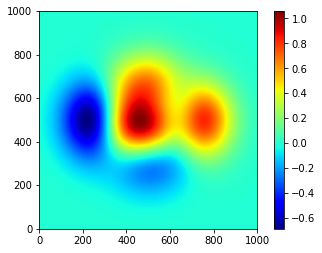

In [3]:
mp.imshow(z, origin='low', cmap='jet')
mp.colorbar()  # 颜色条
mp.show()

#### 等高线图

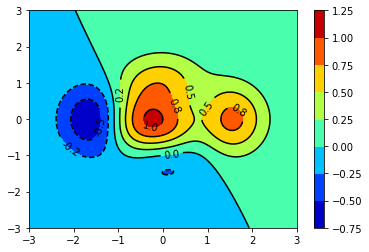

In [4]:
cntr = mp.contour(x, y, z, colors='black')  # 绘制等高线
mp.contourf(x, y, z, cmap='jet')  # 填充颜色
mp.clabel(cntr, fmt='%.1f')  # 显示各等高线的数据标签
mp.colorbar()  # 颜色条
mp.show()

#### 3D曲面图

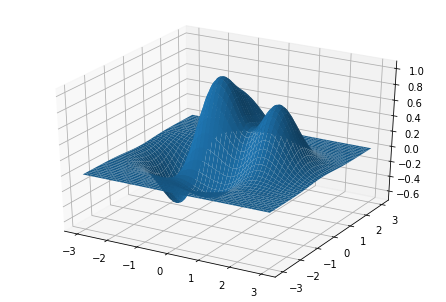

In [5]:
fig = mp.figure('3D')  # 创建figure对象
ax = mplot3d.Axes3D(fig)  # 获取3维坐标轴
ax.plot_surface(x, y, z)
mp.show()

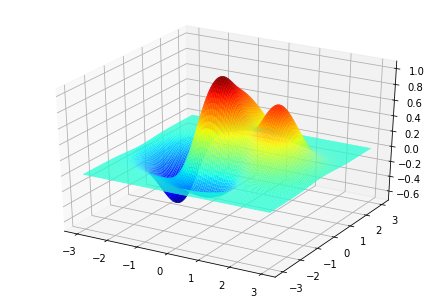

In [6]:
ax = mplot3d.Axes3D(mp.figure())
ax.plot_surface(x, y, z, rstride=9, cstride=9, cmap='jet')
mp.show()

# 折线图

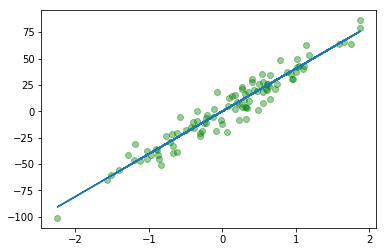

In [7]:
X, y, coef = make_regression(n_features=1, noise=9, coef=True)
x = X.reshape(-1)
mp.scatter(x, y, c='g', alpha=0.4)  # 散点图
mp.plot(x, coef * x)  # 折线图
mp.show()

# 颜色填充

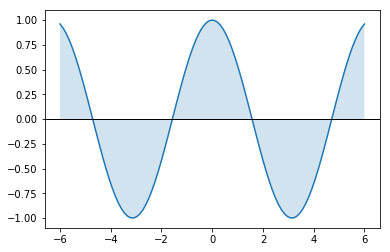

In [8]:
x = np.linspace(-6, 6, 100)
mp.plot(x, np.cos(x))
mp.fill_between(x, np.cos(x), alpha=.2)
mp.axhline(color='black', linewidth=1)
mp.show()

# 气泡图

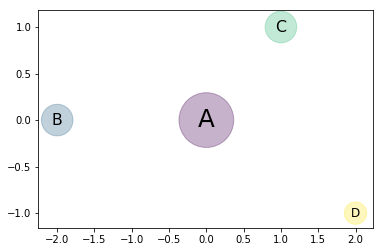

In [9]:
x = [0, -2, 1, 2]
y = [0, 0, 1, -1]
s = [3e3, 1e3, 1e3, 5e2]
c = list(range(4))
t = list('ABCD')
mp.scatter(x=x, y=y, s=s, c=c, alpha=0.3)
for i in range(4):
    mp.text(x[i], y[i], t[i], size=s[i]**.4, ha='center', va='center')
mp.show()

# 3D散点图

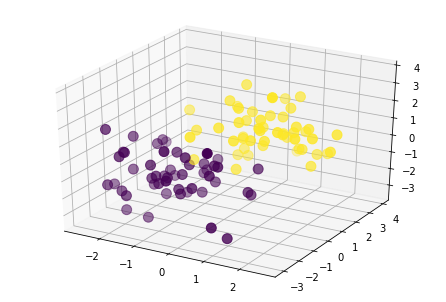

In [10]:
X, y = make_blobs(centers=[[-1, -1, -1], [1, 1, 1]], cluster_std=1)
ax = mplot3d.Axes3D(mp.figure())
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=99, c=y)
mp.show()

# 子图；条形图、饼图

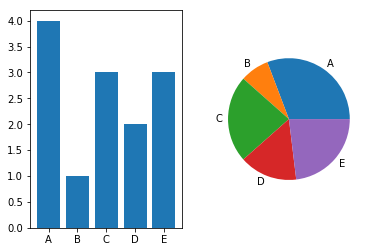

In [11]:
x = list('ABCDE')
y = [4, 1, 3, 2, 3]
mp.subplot(1, 2, 1)
mp.bar(x, y)  # 条形图
mp.subplot(1, 2, 2)
mp.pie(y, labels=x)  # 饼图
mp.show()

# 箱线图、小提琴图、蜂群图

In [12]:
bunch = load_iris()
X = bunch.data
x = X[:, 0]
y = bunch.target
names = bunch.feature_names
df = pd.DataFrame(X, columns=names)

#### 表格

In [13]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


#### 矩阵

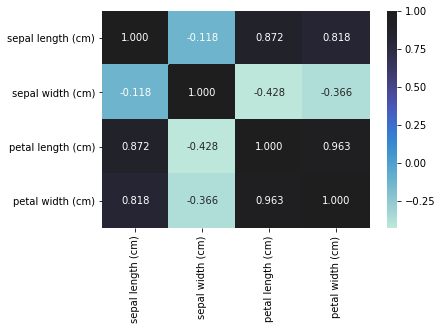

In [14]:
seaborn.heatmap(df.corr(), center=1, fmt='.3f', annot=True)
mp.show()

#### 小提琴图

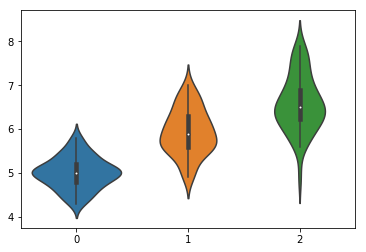

In [15]:
seaborn.violinplot(x=y, y=x)
mp.show()

#### 箱线图

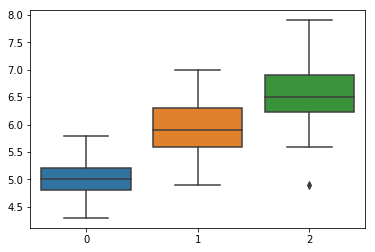

In [16]:
seaborn.boxplot(x=y, y=x)
mp.show()

#### 蜂群图

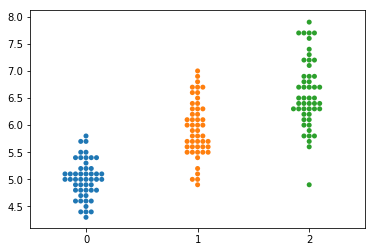

In [17]:
seaborn.swarmplot(x=y, y=x)
mp.show()

#### 带状图

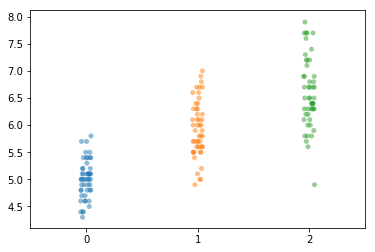

In [18]:
seaborn.stripplot(y, x, alpha=0.5, jitter=0.05)
mp.show()